## **Priestley-Taylor model**
    - Author Michele Bottazzi and Concetta D'Amato
    - Licence Creative Commons 4.0

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| Prospero | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |

### **Component Description**
The GEOframe-NewAge ET component offers the Priestley Taylor formulations for the evapotraspiration modeling:

\begin{equation}
ET_{0}^{PT} = \alpha\dfrac{\Delta\cdot (R_{n} - G)}{\Delta+\gamma}
\end{equation}
With:
\begin{equation}
 G =  \begin{cases}
   G_{morn}\cdot R_{n} \quad daylight\\G_{night}\cdot R_{n} \quad nighttime
   \end{cases} 
\end{equation}
where:
- $ET_{0}$ or $ET$ are expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 

### **Detailed Inputs description**
General description
The input file is a .csv file containing a header and one or more time series of input data,
depending on the number of stations involved. Each column of the file is associated to a
different station.
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8:value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in thiscase, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).


- #### **Net radiation**
The net radiation is given in time series of ($W/m^{2}$) values. The conversion from ($W/m^{2}$) to ($MJ\cdot m^{2}$) is automatically done by the component.
- #### **$G_{morn}$**
$G_{morn}$ is the coefficient for the soil heat flux during daylight
- #### **$G_{night}$**
$G_{night}$ is the coefficient for the soil heat flux during nighttime
- #### **doHourly**
doHourly is a boolean field to set the time step of the simulation (”true” is hourly time step, ”false” is daily).
- #### **Start Date**
Start Date is a string containing the first day of the simulation.
- #### **$\alpha$**
Parameter of the Priestley-Taylor equation. The mean value is 1.26. Adimensional


### **Detailed Outputs description**
The output file will have exactly the same heading of the input file. 
- #### **Time series of the latent heat (W/m$^{2}$)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.
- #### **Time series of the evapotranspiration (mm)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import os
oms_project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(oms_project_path+'/resources/Output')
#os.listdir()

## Read the Priestley-Taylor output

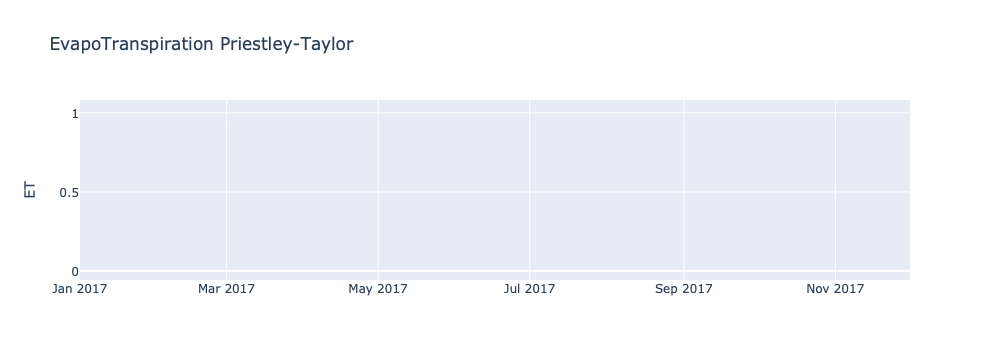

In [14]:
df = pd.read_csv('ETPrestleyTaylor_potential.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['$Datetime$','ET']
fig = px.line(df, x='$Datetime$', y='ET', title='EvapoTranspiration Priestley-Taylor')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

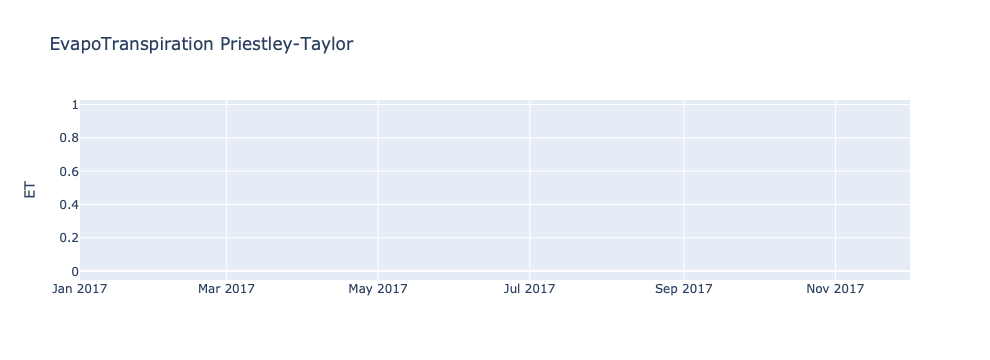

In [15]:
df3 = pd.read_csv('ETPrestleyTaylor_water.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['$Datetime$','ET']
fig = px.line(df3, x='$Datetime$', y='ET', title='EvapoTranspiration Priestley-Taylor')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

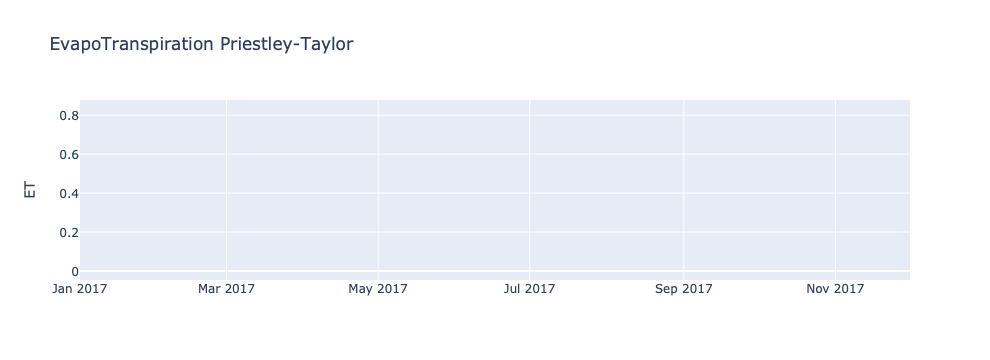

In [16]:
df1 = pd.read_csv('ETPrestleyTaylor_actual.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['$Datetime$','ET']
fig = px.line(df1, x='$Datetime$', y='ET', title='EvapoTranspiration Priestley-Taylor')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

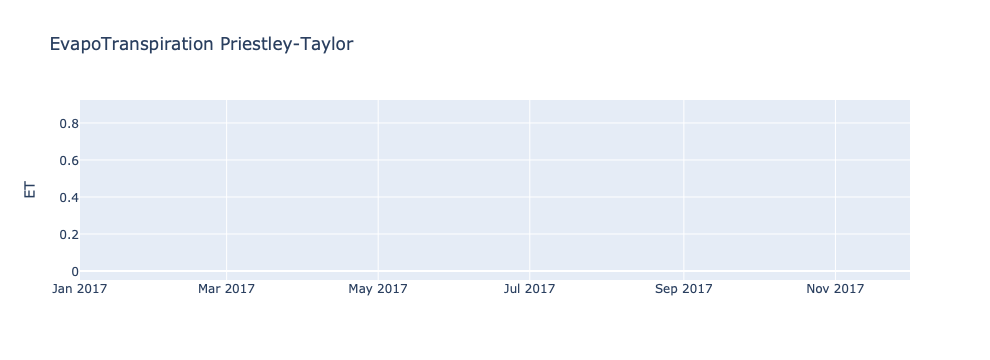

In [17]:
df4 = pd.read_csv('ETPrestleyTaylor_env.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['$Datetime$','ET']
fig = px.line(df4, x='$Datetime$', y='ET', title='EvapoTranspiration Priestley-Taylor')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

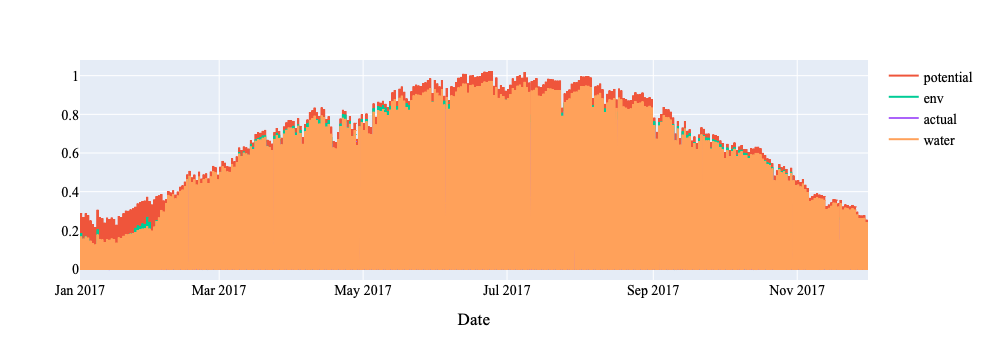

In [18]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['$Datetime$'], y=df['ET'], mode='lines', name='potential'))
fig.add_trace(go.Scatter(x=df4['$Datetime$'], y=df4['ET'], mode='lines', name='env'))
fig.add_trace(go.Scatter(x=df1['$Datetime$'], y=df1['ET'], mode='lines', name='actual'))
fig.add_trace(go.Scatter(x=df3['$Datetime$'], y=df3['ET'], mode='lines', name='water'))


fig.update_layout(
    title='',
    xaxis_title="Date",
    yaxis_title="ET",
    font_family="Times New Roman",
    font_color="Black",
    font=dict(size=14))
fig.show()